In [153]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import os

class Plotting2:      
    def __init__(self):
        return
    
    def plot(self,x,y,*args, **kwargs):
        colr = kwargs.get('colr','b')
        xlab = kwargs.get('xlab','')
        ylab = kwargs.get('ylab','')
        filename = kwargs.get('filename','file')
        show = kwargs.get('show','yes')
        save = kwargs.get('save','no')

        fig, ax = plt.subplots(figsize=(6,4))
        ax.plot(x,y,colr,LineWidth=6)
        ax.set_xlabel(xlab,fontsize='24')
        ax.set_ylabel(ylab,fontsize='24')
        ax.grid()
        plt.tight_layout()
        plt.savefig(str(os.getcwd() + '/figs/' + filename))
        
        self.conditions(show,save)

    def holdplot(self,x,y,row,col,*args,**kwargs):
        
        multi_plot = kwargs.get('multi_plot',1)
        no_plots = len(multi_plot)

        multix = np.zeros((no_plots,len(xx)),dtype=float)
        multiy = np.zeros((no_plots,len(xx)),dtype=float)
        
        for k in range(0,no_plots):
            multix[k] = x[multi_plot[k]]
            multiy[k] = y[multi_plot[k]]
            plt.plot(multix[k],multiy[k])
        plt.show()
        
#         ax, fig = plt.subplots(figsize=(8,6))
#         for i in range(1,row*col+1):
#             ax = plt.subplot(row,col,i)
#             #ax.plot(x[i-1],y[i-1])
#             for i in range(0,no_plots):
#                 ax=plt.plot(x[i-1],y[i-1])
        
#         plt.show()
        #self.conditions(show,save)
    
#     def holdplot(self,x,y,*args,**kwargs):
        
#         multi_plot = kwargs.get('multi_plot',1)
#         no_plots = len(multi_plot)
#         print(no_plot)
#         ax, fig = plt.subplots(figsize=(6,4))
#         for i in range(0,no_plots):
#             ax=plt.plot(x[i],y[i])
#         plt.show()
        
#     def subplot(x,y,row,col,*args, **kwargs):
#         colr = kwargs.get('colr','b')
#         xlab = kwargs.get('xlab','')
#         ylab = kwargs.get('ylab','')
#         filename = kwargs.get('filename','file')
#         show = kwargs.get('show','yes')
#         save = kwargs.get('save','no')
#         no_plots = kwargs.get('no_plots',1)

#         fig, ax = plt.subplots(figsize=(6,4))
#         for i in range(1,row*col+1):
#             ax=plt.subplot(row,col,i)

#             self.holdplot(x[i-1],y[i-1],color=colr[i-1],no_plots,ax)

#             ax.plot(x[i-1],y[i-1],colr[i-1],LineWidth=6)
#             ax.set_xlabel(xlab,fontsize='24')
#             ax.set_ylabel(ylab,fontsize='24')
#             ax.grid()
#             ax.legend(fontsize=16)
#             plt.tight_layout()

#         self.conditions(show,save)
    
#     def holdplot(x,y,no_plots,ax):
#         colr = kwargs.get('color','b')
#         xlab = kwargs.get('xlab','')
#         ylab = kwargs.get('ylab','')
#         filename = kwargs.get('filename','file')
#         show = kwargs.get('show','yes')
#         save = kwargs.get('save','no')
#         no_plots = kwargs.get('no_plots',1)

#         for i in range(1,no_plots):
#             ax.plot(x,y,colr,LineWidth=6)

    def conditions(self,show,save):
        if show=='yes':
            plt.show()
        elif show=='no':
            pass
        else:
            print('you must enter either yes or no for showing the plots')

        if save=='yes':
            plt.show()
        elif save=='no':
            pass
        else:
            print('you must enter either yes or no for showing the plots')



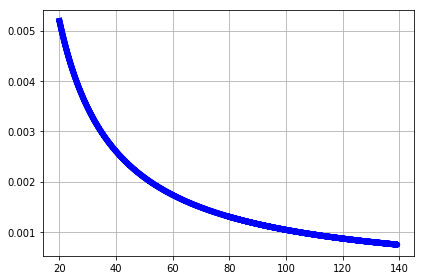

In [157]:
#!/usr/bin/env python
import matplotlib.pyplot as plt
import os
from process_data import ReadComsol,PostProcData
#import Plotting

#read in 1d data from comsol for plotting
bx = ReadComsol.ReadComsol('comsol_datafiles/Bx.csv')
by = ReadComsol.ReadComsol('comsol_datafiles/By.csv')
bn = ReadComsol.ReadComsol('comsol_datafiles/normB.csv')

xx,Bx = bx.read_1D_comsol_data()
xy,By = by.read_1D_comsol_data()
xn,Bn = bn.read_1D_comsol_data()

#centre axis about 0
xx = xx - max(xx)/2
xy = xy - max(xy)/2
xn = xn - max(xn)/2

#calcualte single spin couplinng coefficient
pp = PostProcData.PostProcData()
g = pp.single_spin_coupling(Bx,By)

rho = pp.spin_density(g)
rho = rho / sum(rho)

plts = Plotting2()

xaxes = [xx,xy,xn]
yaxes = [Bx,By,Bn]

#plt1 = plts.holdplot(xaxes,yaxes,1,3,multi_plot=[1,2])
# plt2 = plts.holdplot([xx,xy],[Bx,By],no_plots=2)
plts.plot(g,rho)